# 高斯混合模型（Gaussian mixture model, GMM）

GMM模型试图将数据构造成若干服从高斯分布的概率密度函数簇。

为了便于显示可视化，把数据集降维到2维空间，然后聚类。

# 加载iris数据集

In [25]:
import pandas as pd

iris = pd.read_csv('./data/iris.csv', sep=',')
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

# PCA

In [26]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
# sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

# GMM

In [22]:
from sklearn.mixture import GaussianMixture as GMM      # 1. Choose the model class
model = GMM(n_components=3, covariance_type='full')     # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                                       # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)                           # 4. Determine cluster labels

iris['cluster'] = y_gmm

In [23]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,cluster
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,1
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,1
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,1
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,1
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,1
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532,2
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317,2
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859,2
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628,2


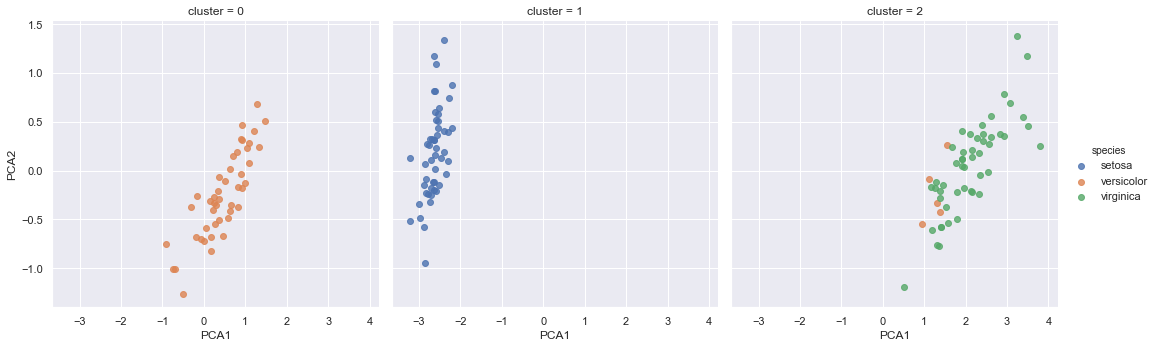

In [24]:
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

> 根据簇数量对数据进行分割，就会清晰地看出GMM算法的训练效果。遗憾的是，第三幅图中还有一点混淆。
>
> 这可以说明，即便没有专家告诉我们每种花的具体种类，但由于每种花的特征差异很大，我们还是可以通过简单的聚类算法自动识别出不同种类的话。